# Tutorial 3: Deep Learning for Images
## Laura E. Boucheron, Electrical & Computer Engineering, NMSU
### October 2020
Copyright (C) 2020  Laura E. Boucheron

This information is free; you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation; either version 3 of the License, or (at your option) any later version.

This work is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the GNU General Public License for more details.

You should have received a copy of the GNU General Public License along with this work; if not, If not, see <https://www.gnu.org/licenses/>.

## Overview
In this tutorial, we will introduce the basic structure and common components (convolutional layers, pooling layers, nonlinearities, fully connected layers, etc.) of deep learning networks through a combination of illustrations and hands-on implementation of a network.  By the end of this tutorial, we will have built from scratch a deep convolutional neural network to operate on the standard MNIST handwritten digits dataset.  We will then explore some ways of probing the characteristics of the trained network to help us debug common pitfalls in adapting network architectures.  

This tutorial contains 7 sections:
  - **Section 0: Preliminaries**: some notes on using this notebook, how to download the image dataset that we will use for this tutorial, and import commands for the libraries necessary for this tutorial
  - **Section 1: The MNIST Dataset** how to load the MNIST dataset and some ideas for visualization of the dataset
  - **Section 2: Data Preprocessing (Dimensionality Wrangling)** how to preprocess the MNIST dataset in preparation for using it to train a deep network, including dimensionality and intensity scaling of the images and coding of the labels
  - **Section 3: Building a CNN for MNIST** how to build a basic 2-layer CNN for classification of MNIST digits including definition of the network architecture, compilation, and training
  - Detour to a powerpoint presentation to learn more about the different CNN layers which are currently training
  - **Section 4: Testing the Trained CNN** how to test the accuracy of the trained network and locate those images incorrectly classified
  - **Section 5: Transfer Learning for MNIST** how to adapt a previously trained network to a new dataset
  - **Section 6: Saving a Trained Model** how to save a trained model so that you can load it and use it later.
  
There are a few subsections with the heading "**Your turn**" throughout this tutorial in which you will be asked to apply what you have learned.  

Portions of this tutorial have been taken or adapted from https://elitedatascience.com/keras-tutorial-deep-learning-in-python and the documentation at https://keras.io.

# Section 0: Preliminaries 
## A Note on Jupyter Notebooks

There are two main types of cells in this notebook: code and markdown (text).  You can add a new cell with the plus sign in the menu bar above and you can change the type of cell with the dropdown menu in the menu bar above.  As you complete this tutorial, you may wish to add additional code cells to try out your own code and markdown cells to add your own comments or notes. 

Markdown cells can be augmented with a number of text formatting features, including
  - bulleted
  - lists

embedded $\LaTeX$, monotype specification of `code syntax`, **bold font**, and *italic font*.  There are many other features of markdown cells--see the jupyter documentation for more information.

You can edit a cell by double clicking on it.  If you double click on this cell, you can see how to implement the various formatting referenced above.  Code cells can be run and markdown cells can be formatted using Shift+Enter or by selecting the Run button in the toolbar above.

Once you have completed (all or part) of this notebook, you can share your results with colleagues by sending them the `.ipynb` file.  Your colleagues can then open the file and will see your markdown and code cells as well as any results that were printed or displayed at the time you saved the notebook.  If you prefer to send a notebook without results displayed (like this notebook appeared when you downloaded it), you can select ("Restart & Clear Output") from the Kernel menu above.  You can also export this notebook in a non-executable form, e.g., `.pdf` through the File, Save As menu.

## Section 0.3a Import Necessary Libraries (For users using a local machine)
Here, at the top of the code, we import all the libraries necessary for this tutorial.  We will introduce the functionality of any new libraries throughout the tutorial, but include all import statements here as standard coding practice.  We include a brief comment after each library here to indicate its main purpose within this tutorial.

It would be best to run this next cell before the workshop starts to make sure you have all the necessary packages installed on your machine.

A few other notes:
 - After the first import of keras packages, you may get a printout in a pink box that states
```
Using Theano backend
```
or
```
Using TensorFlow backend
```
 - You may get one or more warnings complaining about various configs.  As long as you don't get any errors, you should be good to go.  You can, if you wish, fix whatever is causing a warning at a later point in time.  I find it best to copy and paste the error warning itself into a Google search and tack on the OS in which you encountered the error.  Seldom have I encountered an error that someone else hasn't encountered in my same OS.
 - The last two lines in the following code cell import the MNIST and Fashion-MNIST datasets.  Those datasets can be downloaded directly from online, but the `keras` library also includes a tool to do just that.  After you have downloaded the dataset for the first time, `keras` will load the dataset from its local location.  

In [1]:
import numpy as np # mathematical and scientific functions
import matplotlib.pyplot as plt # visualization

# format matplotlib options
%matplotlib inline
plt.rcParams.update({'font.size': 12})

import keras.backend # information on the backend that keras is using
from keras.utils import np_utils # functions to wrangle label vectors
from keras.models import Sequential # the basic deep learning model
from keras.layers import Dense, Flatten, Convolution2D, MaxPooling2D # important CNN layers
from keras.models import load_model # to load a pre-saved model (may require hdf libraries installed)

from keras.datasets import mnist # the MNIST dataset
from keras.datasets import fashion_mnist # the Fashion-MNIST dataset

Using TensorFlow backend.
/Users/jenchang/miniconda/envs/geo_env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/jenchang/miniconda/envs/geo_env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/jenchang/miniconda/envs/geo_env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/j

## Section 0.3b Build the Conda Environment (For users using the ARS HPC Ceres with JupyterLab)
Open a terminal from inside JupyterLab (File > New > Terminal) and type the following commands
```
source activate
conda create --name NMSU-AI-Workshop_image-processing python=3.7 numpy matplotlib imageio scikit-image ipykernel -y
```
It may take 5 minutes to build the Conda environment. 

When the environment finishes building, select this environment as your kernel in your Jupyter Notebook (click top right corner where you see Python 3, select your new kernel from the dropdown menu, click select) 

You will want to do this BEFORE the workshop starts.

A few other notes:
 - After the first import of keras packages, you may get a printout in a pink box that states
```
Using Theano backend
```
or
```
Using TensorFlow backend
```
 - You may get one or more warnings complaining about various configs.  As long as you don't get any errors, you should be good to go.  You can, if you wish, fix whatever is causing a warning at a later point in time.  I find it best to copy and paste the error warning itself into a Google search and tack on the OS in which you encountered the error.  Seldom have I encountered an error that someone else hasn't encountered in my same OS.
 - The last two lines in the following code cell import the MNIST and Fashion-MNIST datasets.  Those datasets can be downloaded directly from online, but the `keras` library also includes a tool to do just that.  After you have downloaded the dataset for the first time, `keras` will load the dataset from its local location.  

# Section 1: The MNIST Dataset

## 1.1 Importing the MNIST dataset
The line in the code cell above that reads `from keras.datasets import mnist` has loaded the `keras` package that interfaces with the local copy of MNIST dataset.

### Printing out the current backend
Before we get going, let's check which backend keras is using. All subsequent instructions should be valid for either `tensorflow` or `theano`.

In [2]:
print(keras.backend.backend())

tensorflow


### A note on other standard datasets included in keras
As a note, there are other datasets available as part of `keras.datasets`, see https://keras.io/datasets/ for more information.

## 1.2 Load training and test data
Now we can use the `mnist.load_data` function to read in the standard training data and test data.  The first time you run the following command you will see a printout of the download progress.  Subsequent times you run the command, you will not see any printout as the data will be loaded from where `keras` stored it locally on your computer.  The `mnist.load_data` function outputs `numpy` arrays.

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [4]:
help(mnist.load_data)

Help on function load_data in module keras.datasets.mnist:

load_data(path='mnist.npz')
    Loads the MNIST dataset.
    
    # Arguments
        path: path where to cache the dataset locally
            (relative to ~/.keras/datasets).
    
    # Returns
        Tuple of Numpy arrays: `(x_train, y_train), (x_test, y_test)`.



### A note on the variable name conventions
In loading the MNIST data, we are storing the data (images) in `X_train` and `X_test` and the corresponding labels in `y_train` and `y_test`.  It is common convention to label the input data with a capital 'X' and the labels with a lowercase 'y'.  Since these data are images which can be represented as arrays, the convention of using 'X' and 'y' comes from matrix notation where vectors are assigned a lowercase variable and matrices an uppercase variable.  

## 1.3 Checking dimensionality of the MNIST data variables
We know that the MNIST dataset consists of 70,000 examples of $28\times28$ pixels images of handwritten digits from 0-9.  We also know that there are 60,000 images reserved for training and 10,000 reserved for testing.  As such, we expect that the dimensionality of `X_train` and `X_test` to reflect this.  We print the shape of the two variables. 

In [5]:
print('The dimensions of X_train are:')
print(X_train.shape)
print('The dimensions of X_test are:')
print(X_test.shape)

The dimensions of X_train are:
(60000, 28, 28)
The dimensions of X_test are:
(10000, 28, 28)


We also check the variable types of `X_train` and `X_test`.  Since the `mnist.load_data` function outputs `numpy` arrays, we need to use the `dtype` method to query the variable type.

In [6]:
print('The variable type of X_train is:')
print(X_train.dtype)
print('The variable type of X_test is:')
print(X_test.dtype)

The variable type of X_train is:
uint8
The variable type of X_test is:
uint8


In [7]:
type(X_train)

numpy.ndarray

In [8]:
whos

Variable        Type        Data/Info
-------------------------------------
Convolution2D   type        <class 'keras.layers.convolutional.Conv2D'>
Dense           type        <class 'keras.layers.core.Dense'>
Flatten         type        <class 'keras.layers.core.Flatten'>
MaxPooling2D    type        <class 'keras.layers.pooling.MaxPooling2D'>
Sequential      type        <class 'keras.engine.sequential.Sequential'>
X_test          ndarray     10000x28x28: 7840000 elems, type `uint8`, 7840000 bytes (7.476806640625 Mb)
X_train         ndarray     60000x28x28: 47040000 elems, type `uint8`, 47040000 bytes (44.86083984375 Mb)
fashion_mnist   module      <module 'keras.datasets.f<...>tasets/fashion_mnist.py'>
keras           module      <module 'keras' from '/Us<...>kages/keras/__init__.py'>
load_model      function    <function load_model at 0x7fba8e909680>
mnist           module      <module 'keras.datasets.m<...>keras/datasets/mnist.py'>
np              module      <module 'numpy' from '/

### A note on tensors
In the literature and documentation related to deep learning, you will see the word "tensor" quite often.  We have just encountered our first tensors.  Think of tensors as multidimensional arrays.  `X_train` took the 60,000 $28\times28$ 2D pixel arrays, each of which represents an image, and stacked them to create a 3D array (tensor).  Before we're done here, we'll add a fourth dimension to `X_train` and `X_test`.

## 1.4 Visualizing an MNIST image
From these dimensions, it appears that the first dimension indexes the sample (image) and the second and third dimensions index the spatial dimensions of the image.  It also appears that the images are `uint8`. We can check this assumption by visualizing one of the samples of `X_train`.  In this case we look at the first image in `X_train`.

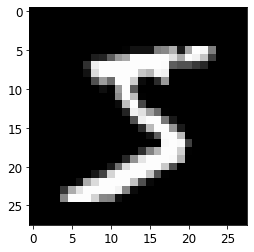

In [9]:
plt.figure()
plt.imshow(X_train[0],cmap='gray')
plt.show()

In [10]:
for d in range(0,10):
    print('There are '+str((y_train==d).sum())+\
          ' images of digit '+str(d))

There are 5923 images of digit 0
There are 6742 images of digit 1
There are 5958 images of digit 2
There are 6131 images of digit 3
There are 5842 images of digit 4
There are 5421 images of digit 5
There are 5918 images of digit 6
There are 6265 images of digit 7
There are 5851 images of digit 8
There are 5949 images of digit 9


In [11]:
for d in range(0,10):
    print('There are '+str((y_test==d).sum())+\
          ' images of digit '+str(d))

There are 980 images of digit 0
There are 1135 images of digit 1
There are 1032 images of digit 2
There are 1010 images of digit 3
There are 982 images of digit 4
There are 892 images of digit 5
There are 958 images of digit 6
There are 1028 images of digit 7
There are 974 images of digit 8
There are 1009 images of digit 9


## <span style='color:Green'> Your turn: </span>
Look at some other images in `X_train` or `X_test`.  Does there appear to be any order in which the digits appear?

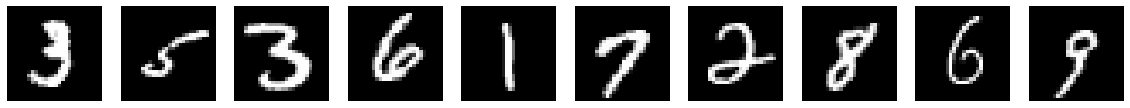

In [12]:
plt.figure(figsize=(20,20))
for k in range(10,20):
    plt.subplot(1,10,(k%10)+1)
    plt.imshow(X_train[k],cmap='gray')
    plt.axis('off')
plt.show()

There does not appear to be any order to the digits--they appear to be random.

## 1.5 MNIST label vectors
The `y_train` variable contains the label, or the "truth" of what is represented in the image.  We can print out the label for the same image we visualized above (the first image in `X_train`).

In [13]:
print(y_train[0])

5


This indicates that the image we plotted above corresponds to a ground truth label of '5'. 

## <span style='color:Green'> Your turn: </span>
Revise your code from above to title your plot with the ground truth label.

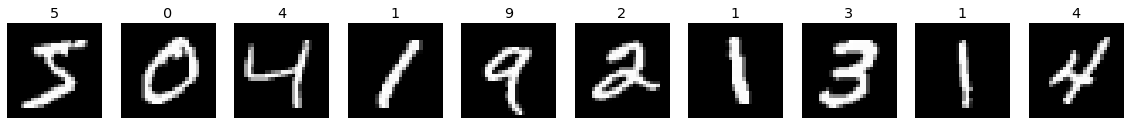

In [14]:
plt.figure(figsize=(20,20))
for k in range(0,10):
    plt.subplot(1,10,(k%10)+1)
    plt.imshow(X_train[k],cmap='gray')
    plt.title(y_train[k])
    plt.axis('off')
plt.show()

## 1.5 A visualization of the digit variation in MNIST
In addition to providing the labels for training a supervised classifier, these label vectors provide an important way to index into our dataset.  The following subsection illustrates one use of the label vector.

We can get a brief sense of the sort of variation included in this dataset by plotting 10 examples for each of the digits.  The following code makes use of the `X_train` variable and also the corresponding labels in `y_train`.  

In the following code, we loop over the 10 digits using variable `d` and over 10 examples using variable `k`.  We plot the first 10 examples for each digit.  Let's take a more careful look at the syntax `X_train[np.where(y_train==d)[0][k],:,:]`
  - the `np.where(y_train==d)` finds those indexes where the ground truth indicates that we have a specific digit
  - the `np.where` command returns a tuple; in this case there is only one dimension to the tuple, so we pull of the first dimension, so we have `np.where(y_train==d)[0]`
  - we now pull off the `k`-th index, so we have `np.where(y_train==d)[0][k]`
  - now we need to grab the image corresponding to the `k`-th instance of the digit `d`, and we have `X_train[np.where(y_train==d)[0][k],:,:]`

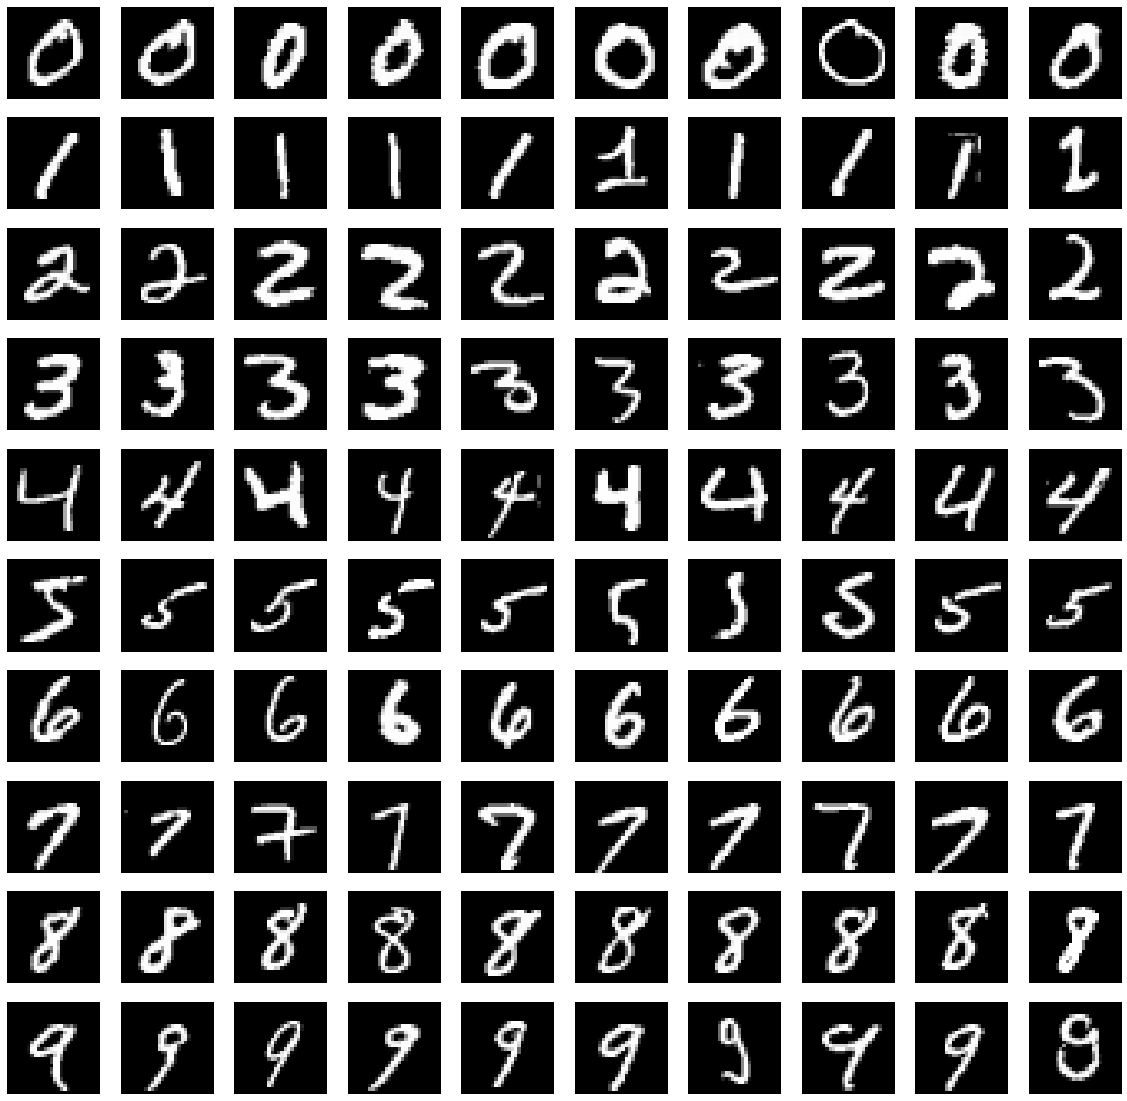

In [15]:
plt.figure(figsize=(20,20))
for d in range(0,10): # loop over the digits 0 through 9
    for k in range(0,10): # choose 10 example images for each digit
        plt.subplot(10,10,d*10+k+1) # select the current subplot
        plt.imshow(X_train[np.where(y_train==d)[0][k],:,:],cmap='gray') # plot the image
        plt.axis('off')

# Section 2: Data Preprocessing (Dimensionality Wrangling)

## 2.1 Input data dimensionality considerations
`keras` with the `theano` backend expects input to be tensors of the form samples $\times$ channels $\times$ height $\times$ width (`'channels_first'`) or samples $\times$ height $\times$ width $\times$ channels (`'channels_last'`).  

MNIST images are one channel (grayscale), but we don't see that explicitly represented in the shape of `X_train` or `X_test`.  Thus, we need to add a dimension to the `X_train` and `X_test` tensors to have the proper shape.  

We can do this with the `reshape` command.  We choose the `'channels_last'` option and and tack on the channel as the fourth dimension.  

In [16]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

Now when we check the shape, we find the expected form samples $\times$ height $\times$ width $\times$ channels.

In [17]:
print('The dimensions of X_train are:')
print(X_train.shape)
print('The dimensions of X_test are:')
print(X_test.shape)

The dimensions of X_train are:
(60000, 28, 28, 1)
The dimensions of X_test are:
(10000, 28, 28, 1)


We note that there is a default assumption of either `'channels_last'` or `'channels_first'` for each deep learning framework such as `theano` or `tensorflow`.  To avoid potential misinterpretation, we will explicitly specify `data_format='channels_last'` in our `keras` code below.  

### A note on the importance of dimensionality
This is the first example of the care with which we need to consider the shape/dimensionality of our data.  This example is specific to `keras`, but the general principles here are similar for other deep learning frameworks, e.g., `tensorflow`, `caffe`, `pytorch`.

## <span style='color:Green'> Your turn: </span>
Above, you worked with the original `X_train` and `X_test` arrays as loaded by `keras`.  Now we have expanded the dimensions of those arrays.  Does your visualization code from above still work?

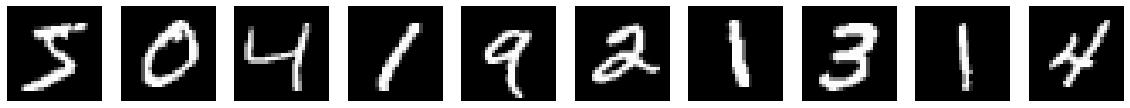

In [18]:
plt.figure(figsize=(20,20))
for k in range(0,10):
    plt.subplot(1,10,k+1)
    plt.imshow(X_train[k],cmap='gray')
    plt.axis('off')
plt.show()

Depending on your library versions, you may have found that your visualization code from above no longer works.  If you get an error, it is likely similar to
```
TypeError: Invalid shape (28,28,1) for image data
```
when you try to visualize one of the MNIST images.  This error is due to the very fact that we explicitly expanded the dimensions to make `keras` happy.

## <span style='color:Green'> Your turn: </span>
Modify your code to work with the newly shaped `X_train` and `X_test` arrays.  The `np.squeeze` method for numpy arrays will likely be of use here: it removes single-dimensional entries from the shape of an array.  Note--you do not want to actually modify the shape of `X_train` or `X_test` here.  Your goal is to modify the visualization code to deal with the singleton dimensions.  Even if you were able to runt he code above, it is a good exercise to learn the usage of `np.squeeze` as other functions may grumble about singleton dimensions in the future.

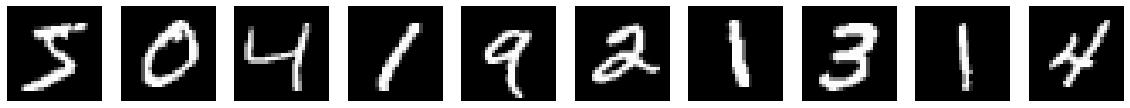

In [19]:
plt.figure(figsize=(20,20))
for k in range(0,10):
    plt.subplot(1,10,k+1)
    plt.imshow(X_train[k].squeeze(),cmap='gray')
    plt.axis('off')
plt.show()

## 2.2 Input data intensity scaling considerations
We noted earlier that `X_train` and `X_test` are of variable type `uint8`.  It is considered best practice to normalize the range of your input data, commonly to $[0,1]$.  Back in the world of classical machine learning, this avoids a specific feature dominating the classification simply because it is larger.  In deep learning, continuing this convention allows for more consistency and robustness in the computation of the various gradients during training.  The risk of overflow (exceeding the capabilities of a variable type to represent a very large number) or underflow (exceeding the capabilities of a variable type to represent a very small, i.e., close to zero, number) is very real in deep learning.

## <span style='color:Green'> Your turn: </span>
Before we normalize the input data intensity, we should double check that the variables are within the range we expect.  Verify that `X_train` and `X_test` are within the expected range of [0,255] for a `uint8` variable.

In [20]:
print('The range of X_train is ['+\
      str(X_train.min())+','+str(X_train.max())+']')
print('The range of X_test is ['+\
      str(X_test.min())+','+str(X_test.max())+']')

The range of X_train is [0,255]
The range of X_test is [0,255]


### Casting the data as float

Here, we cast the `numpy` arrays as `float32` and divide by the maximum we expect for a `uint8` variable (255).

In [21]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

## <span style='color:Green'> Your turn: </span>
Check the range of the normalized `X_train` and `X_test` arrays to verify that they are now in the range [0,1].

In [22]:
print('The range of X_train is ['+str(X_train.min())+','+str(X_train.max())+']')
print('The range of X_test is ['+str(X_test.min())+','+str(X_test.max())+']')

The range of X_train is [0.0,1.0]
The range of X_test is [0.0,1.0]


### A note on other common data preprocessing methods
There are a suite of common data preprocessing methods.  Most of these involve some form of statistical normalization.  For example, we might scale our data to have a mean of 0 and a standard deviation of 1.  Or we might whiten the data to make it more normally distributed.  Here we have considered a simple range normalization, but note that other standard preprocessing routines exist.  See https://keras.io/preprocessing/image/ for some examples of other preprocessing methods and syntax for the built-in functions in `keras` to perform those methods.

### A note on the use of float32 or float64
In this case we cast as `float32` since that is already overkill for `uint8` variables and it will take up less memory than casting those arrays as `float64`.  We note, however, that if your data is natively `float64`, you probably want to leave it as such.

## 2.3 Label vector coding
### 2.3.1 Dimensionality of the loaded label vectors
Now we turn our attention to the label vectors.  We check the shape of the label vectors.

In [23]:
print('The dimensions of y_train are:')
print(y_train.shape)
print('The dimensions of y_test are:')
print(y_test.shape)

The dimensions of y_train are:
(60000,)
The dimensions of y_test are:
(10000,)


We have already looked at entries in `y_train` and `y_test` and noted that they are integers that (at least in this case) directly correspond to the digit that the image represents.  More on this in a bit...

However... `keras` (and many other common classification and deep learning frameworks) expects labels of shape $N_\text{samples}\times N_\text{classes}$.  We see that we are okay in terms of $N_\text{samples}$ (60,000 for training and 10,000 for test), but we have an empty second dimension. We somehow need to reconfigure the label vectors so that they will be $60,000\times10$ for `y_train` and $10,000\times10$ for `y_test`.  How do we get to a $60,000\times10$ array for the labels?

### 2.3.2 A brief introduction to one-hot coding
What we really need is a representation of the label vectors that better matches the typical output of a neural network.  The output layer of a neural network classifier will have $N_\text{classes}$ nodes.  In a typical application, the last layer is a `softmax` layer which outputs *probabilities of a sample belonging to each of the classes* $C_j,~j=0,\ldots,N_\text{classes}-1$.  Thus, the `softmax` layer for an MNIST digit classification will have form $$[p(C_0),p(C_1),p(C_2),p(C_3),p(C_4),p(C_5),p(C_6),p(C_7),p(C_8),p(C_9)]^T.$$  A simple argmax predicts the label as the class with the highest probability, i.e., $\hat{y}=\text{argmax}_j p(C_j)$.  This means that if the network is absolutely 100% certain that a sample is a digit '3', all coefficients in the softmax layer will be zero except the coefficient corresponding to the digit '3', i.e., $$[0,0,0,1,0,0,0,0,0,0]^T$$ with $\hat{y}=3$.  

This gives us insight into how to "encode" the *input* label vector.  We want a value of 1 for the given class and zeros everywhere else; this is also known as **one-hot coding**.

### 2.3.3 What do labels "mean"?
If we print the first ten labels in `y_train`, we see that the labels are reported as the digit itself.

In [24]:
print('The first ten entries of y_train are:')
print(y_train[:10])

The first ten entries of y_train are:
[5 0 4 1 9 2 1 3 1 4]


In this case there is a very direct and obvious relationship between the label and the meaning.  If `y_train==3`, the data is an image of the numeral three.  

### A very important note on the abstractness of labels
It is important to keep in mind, however, that these labels are a very abstract concept--when we see the ASCII character '3' printed in the first ten entries of `y_train` above, we interpret that to mean 'an image of the numeral three.'  We could just as easily have labeled the images of the numeral three with the label 'hamster' and *nothing* about the following code would change.  The performance we will see below on the ability to correctly classify all images of the numeral 3 would be identical.  The only difference is that the network would very cheerfully report that an image of the numeral three is a 'hamster' instead of a '3'.  And it would be correct because we would have told it that images of the numeral three are 'hamsters.'  

This highlights the importance of leveraging humans to provide labels for the training data.  It is the humans that are providing the abstract intepretation of what those images represent.  Computers, however, only understand numbers.  So we need to find some means to translate our abstract notion of the classes of the input data to something numerical for the computer to interpret.  

As a more concrete example of this abstractness of the labels, consider the Fashion-MNIST dataset (see also https://keras.io/datasets/).  This dataset was designed to be a drop-in replacement for MNIST.  The dimensionality is exactly the same (60,000 28$\times$28 pixel training images and 10,000 28$\times$28 pixel testing images), but the images are grayscale images of clothing articles.  Thus in the Fashion-MNIT dataset, if ground truth label is specified as '3', instead of interpreting that as 'an image of the 'numeral three,' you interpret that as 'an image of a dress.'

A convenient and common translation is to these one-hot coded vectors.  Different frameworks and different networks may have different conventions.

### 2.3.4 Converting labels to one-hot coding
We will use the `keras` function `np_utils.to_categorical` to convert the label vector to a one-hot vector.  We specifying `y_train` or `y_test` as input and denote the one-hot label vector with a capital `Y` to remind ourselves that this is now actually a matrix of probabilities and thus a very different representation than the original label vector.

In [25]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

Let's check the dimensionality of these new one-hot labels `Y_train` and `Y_test`.

In [26]:
print('The dimensions of Y_train are:')
print(Y_train.shape)
print('The dimensions of Y_test are:')
print(Y_test.shape)

The dimensions of Y_train are:
(60000, 10)
The dimensions of Y_test are:
(10000, 10)


We note that the first dimension of `Y_train` and `Y_test` correspond to the sample and the second dimension consists of 10 entries.  Let's look at the one-hot label for the first 10 samples in `Y_train` and compare to the first 10 samples in the original label vector `y_train`.

In [27]:
print('The first ten entries of y_train (original label vector) are:')
print(y_train[0:10])
print('The argmax of the first ten entries of Y_train (one-hot label vector) are:')
print(Y_train[0:10,:])

The first ten entries of y_train (original label vector) are:
[5 0 4 1 9 2 1 3 1 4]
The argmax of the first ten entries of Y_train (one-hot label vector) are:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


## <span style='color:Green'> Your turn: </span>
Verify to yourself that the correct entries in the one-hot label vector are hot.

We use the first entry as an example.  The first label is '5', so we expect that index 5 of the first row in `Y_train` should be 1 and all others zero.  Recalling that `python` indexes beginning at 0 (which is also very convenient for the MNIST dataset that begins at 0), we find that index 5 of the first row is indeed the only value of 1.

### 2.3.5 Converting labels from one-hot coding
We can double check ourselves by applying an argmax to the one-hot labels.  We expect to get back the original labels.

In [28]:
print('The first ten entries of y_train (original label vector) are:')
print(y_train[0:10])
print('The first ten entries of Y_train (one-hot label vector) are:')
print(np.argmax(Y_train[0:10,:],axis=1))

The first ten entries of y_train (original label vector) are:
[5 0 4 1 9 2 1 3 1 4]
The first ten entries of Y_train (one-hot label vector) are:
[5 0 4 1 9 2 1 3 1 4]


We find that we do get back the original labels.

# Section 3: Building a CNN for MNIST

Now we've loaded and preprocessed the input data (samples `X_train` and labels `y_train`) needed to train a deep learning network.  We need to decide the specific architecture of the network itself.  We begin here with a simple 2-layer network.  This network will result in approximately 95% accuracy on the training data after several epochs, but can take a few minutes per epoch to run on a CPU.  As such, we will set this up to run and then cycle back around to understand the details as it is training.

Within each epoch of training, the entire training dataset is visited once.  Thus, an epoch can be thought of in the general sense of an iteration.  Deep learning uses the distinct terminology of epoch to specifically mean the one visit of the entire training set.  Within each epoch, you have batches of the input data.  The decomposition of an epoch into multiple batches is particularly important for very large datasets that cannot fit into working memory.

## 3.1 Import necessary keras library functions
In Section 0.3 we directly imported only those functions we use from `keras` to make our code more compact.  

## 3.2 Define the model architecture
Next we define our first model, which we call `model1`.  We'll cycle back to understand the components of this model after we set it training, but also include some descriptions here:
 - The `Sequential` model is the base class used in `keras` to define a sequential stack of layers
 - The `Convolution2D` layer defines a typical convolution layer.  This layer takes a tensor of images as input and outputs a tensor of images.  Note that you need to define the input shape for the first convolutional layer $28\times28\times1$ in this case.  The input shape for all subsequent layers is automatically inferred to be the same as the output shape for the previous layer.  We explicitly specify `'channels_last'` for the `data_format` since that is how we defined our input data.  Note that for CNNs we generally only count the convolutional layers when reporting on the depth of the network.
 - The `MaxPooling2D` layer reduces the spatial dimensions of the input tensor.  We again explicitly specify `'channels_last'` for the `data_format`.
 - The `Flatten` layer essentially reshapes the dimensions of the data.  In this case it takes the $28\times28\times32$ tensor output from the second convolutional layer and reshapes it into a length $28*28*32=25088$ vector.
 - The `Dense` layer is the layer type for fully connected (i.e., dense) layers.  This type of layer defines a connection from all nodes in the previous layer to all nodes in the subsequent layer.  The first layer defined here takes the 25088 inputs and outputs 128 values.  The second fully connected layer takes those 128 as input and outputs 10 values.  
 - Note that the size of the output layer is consistent with the number of classes in our dataset (10 in this case) and that we have specified a `'softmax'` activation. This means that the output will be the probability of an example belonging to each of the 10 classes. 

In [29]:
model1 = Sequential()
model1.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1), data_format='channels_last'))
model1.add(Convolution2D(32, (3, 3), activation='relu', data_format='channels_last'))
model1.add(MaxPooling2D(pool_size=(2,2),data_format='channels_last'))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(10, activation='softmax'))

## 3.3 Compile the model
Next we need to compile the model before we can train it.  This requires specification of several parameters including the `loss`, the `optimizer` and the `metrics`.  Again, we will cycle back to understand these after we set it training.  We specify a minimum of options here, including:
 - The loss function which is what the network uses to gauge its performance as it trains.  In this case we use `'categorical_crossentropy'` which is a common loss function for multi-class classification problems.  This loss expects labels in one-hot coded format.
 - The optimizer which is how the network adjusts its learning as it trains.  In this case we use the `'adam'` optimizer which is a good optimizer in the absence of any other prefered optimizer.  The `'adam'` optimizer adjusts the learning rate throughout the training process to help convergence.
 - The `metrics` which are the "human-interpretable" measurements of network performance.  Here we request the accuracy which will be a the percentage of correctly classified digits.

In [30]:
model1.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

## 3.4 Train the model
Now we finally start the actual training of this model.  We input the `X_train` and `Y_train` variables that we worked with above, and specify a few simulation parameters such as `batch_size` and `epochs` which we will cycle back to in a while.  We specify `verbose=1` in order to print out status so we can keep track of where we are in the training process.

You may get one or more warnings, but as long as you don't get any errors, you should see 
something of the form
```
Epoch 1/10
38208/60000 [==================>..........] - ETA: 1:12 - loss: 0.1849 - acc: 0.9448
```

We have specified a total of 1 epoch, so the ETA specified at the beginning of the current epoch is approximately the total time the training is expected to take.  How long the training takes is very dependent on the hardware and how well that hardware is configured to perform the sort of computation required for CNN training.  On my desktop machine (AMD Ryzen 7 2700X 4.3 GHz processor), the training took about 3.5 minutes on all 8 CPUs.  While this might be longer than the average person is accustomed to waiting for a computer to finish processing, this is actually a very reasonable time to train a complete deep network.  This is because the MNIST dataset is not too large, nor is the network we specified.  Ordinarily, we would (need to) run the training for more than one epoch.  For MNIST, however, we can converge to a very good accuracy within one epoch.

In [31]:
model1.fit(X_train, Y_train, batch_size=64, epochs=1, verbose=1)


Epoch 1/1
60000/60000 [==============================] - 84s 1ms/step - loss: 0.1385 - accuracy: 0.9585


There are some other issues related to testing the trained network that we will return to in Section 4.  For the remainder of this section, we focus on deepening our understanding of this model that we have trained on MNIST.

## 3.5 Some Common Errors in Defining, Compiling, and Training the Model
Error reporting is not always the most elucidating in deep learning models.  Here we explore some common errors in model definition, compilation, and training.  Below, we have copied the definition, compilation, and training stages from above and named this new model `model2`.  You can copy and paste this code into subsequent code cells and modify different aspects of the three stages to explore the effects and/or error messages encountered.

In [32]:
model2 = Sequential()
model2.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1), data_format='channels_last'))
model2.add(Convolution2D(32, (3, 3), activation='relu', data_format='channels_last'))
model2.add(MaxPooling2D(pool_size=(2,2),data_format='channels_last'))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(10, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

model2.fit(X_train, Y_train, batch_size=64, epochs=1, verbose=1)

Epoch 1/1
60000/60000 [==============================] - 66s 1ms/step - loss: 0.1348 - accuracy: 0.9596


## 3.5.1 Errors that actually report as errors
The following errors should actually report as an error.  That error may or may not be particularly ellucidating in helping you find the source of the error if you weren't aware of the source in advance.

## <span style='color:Green'> Your turn: </span>
What happens if you specify `data_format='channels_first'`?  How useful is the error in this case?

In [33]:
model2 = Sequential()
model2.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1), data_format='channels_first'))
model2.add(Convolution2D(32, (3, 3), activation='relu', data_format='channels_first'))
model2.add(MaxPooling2D(pool_size=(2,2),data_format='channels_first'))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(10, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

model2.fit(X_train, Y_train, batch_size=64, epochs=1, verbose=1)

ValueError: Negative dimension size caused by subtracting 3 from 1 for 'conv2d_5/convolution' (op: 'Conv2D') with input shapes: [?,28,1,28], [3,3,28,32].

## <span style='color:Green'> Your turn: </span>
What happens if you forget the flatten layer?  How useful is the error in this case?

In [34]:
model2 = Sequential()
model2.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1), data_format='channels_last'))
model2.add(Convolution2D(32, (3, 3), activation='relu', data_format='channels_last'))
model2.add(MaxPooling2D(pool_size=(2,2),data_format='channels_last'))
#model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(10, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

model2.fit(X_train, Y_train, batch_size=64, epochs=1, verbose=1)

ValueError: Error when checking target: expected dense_6 to have 4 dimensions, but got array with shape (60000, 10)

## <span style='color:Green'> Your turn: </span>
What happens if you specify an output layer that is not length 10?  How useful is the error in this case?

In [35]:
model2 = Sequential()
model2.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1), data_format='channels_last'))
model2.add(Convolution2D(32, (3, 3), activation='relu', data_format='channels_last'))
model2.add(MaxPooling2D(pool_size=(2,2),data_format='channels_last'))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(128, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

model2.fit(X_train, Y_train, batch_size=64, epochs=1, verbose=1)

ValueError: Error when checking target: expected dense_8 to have shape (128,) but got array with shape (10,)

## 3.5.2 Errors that don't appear to be errors at first

Sometimes, errors in your specification of the model will not result in an explicit coding error, which may cause further issues in debugging.  Here are two examples that we will explore further after we study more about testing models in Section 4.

What happens if you use a `'tanh'` activation instead of a `'softmax'` activation on the output layer?

In [36]:
model3 = Sequential()
model3.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1), data_format='channels_last'))
model3.add(Convolution2D(32, (3, 3), activation='relu', data_format='channels_last'))
model3.add(MaxPooling2D(pool_size=(2,2),data_format='channels_last'))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dense(10, activation='tanh'))

model3.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

model3.fit(X_train, Y_train, batch_size=64, epochs=1, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/1
60000/60000 [==============================] - 76s 1ms/step - loss: nan - accuracy: 0.0995


What happens if we specify a `'binary_crossentropy'` loss function instead of `'categorical_crossentropy'`?

In [37]:
model4 = Sequential()
model4.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1), data_format='channels_last'))
model4.add(Convolution2D(32, (3, 3), activation='relu', data_format='channels_last'))
model4.add(MaxPooling2D(pool_size=(2,2),data_format='channels_last'))
model4.add(Flatten())
model4.add(Dense(128, activation='relu'))
model4.add(Dense(10, activation='softmax'))

model4.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

model4.fit(X_train, Y_train, batch_size=64, epochs=1, verbose=1)

Epoch 1/1
60000/60000 [==============================] - 71s 1ms/step - loss: 0.0247 - accuracy: 0.9917


# Section 4: Testing the Trained CNN

## 4.1 Determining accuracy on test data
The accuracies that you see reported as the network trains are the accuracies on the *training* data.  This can be a good indication of the convergence of the network since you expect that the loss should decrease and accuracy should increase as training progresses.

There is concern, however, that the network has "learned the data" instead of learned a more general classifier.  That is why we set aside a separate test set.  All of the data in the test set were unseen in training and thus are brand new to the network.  If the network is good and has not overfit the training data (learned the training data), we expect to see a good accuracy on the test data.  We expect that the test accuracy will likely be a bit lower than the training accuracy.

We can take the trained model and evaluate it on a dataset using the `evaluate` method of the trained model.  As a sanity check, if we were to input the training data again, we would expect exactly the last accuracy reported in training. 

We again use the `verbose=1` option here to track the progress of evaluating the model on all 10,000 test images.  

In [38]:
score = model1.evaluate(X_test, Y_test, verbose=1)
print(score)

10000/10000 [==============================] - 2s 235us/step
[0.04633118003048003, 0.9853000044822693]


Note that the test stage is very quick. The major computational overhead in deep learning is in training.  The operational use of the trained model is very computationally light.  On my desktop computer, using the CPU, all 10,000 test images were labeled and compared to their ground truth in 8s, or 840 $\mu$s per image.  This reported two values after completion.  We can check what those values are by looking at the `metrics_names` attribute of the model.

In [39]:
print(model1.metrics_names)

['loss', 'accuracy']


We note that these metrics are the loss and accuracy.  The loss is reported by default since that is the metric used by the network during training.  We requested that the network keep track of the additional metric of accuracy with the option `metrics=['accuracy']` when compiling the model.

## 4.2 Determining the predicted labels
### 4.2.1 Determining the one-hot labels
We might want more information than just a summary of the accuracy.  If we output the predicted label for each of the test images, we can look more carefully at the performance of the network.  We use the `predict` method of the model.  This has to run all 10,000 test images through the trained network and determine the class for each image.

In [40]:
Y_predict = model1.predict(X_test,verbose=1)

10000/10000 [==============================] - 3s 304us/step


When we computed the one-hot coded label vector used to train the network, we began with the assumption that a one-hot form is consistent with the native output of the network.  We would thus expect that `Y_predict` is in a one-hot format.  We check this by printing the dimensions of `Y_predict`.

In [41]:
print(Y_predict.shape)

(10000, 10)


`Y_predict` does have the dimensions we would expect for a one-hot coded label vector.  Similar to our process when we developed the one-hot coded vector `Y_test`, we can look at the first 10 entries of `Y_predict`.

In [42]:
print(Y_predict[0:10,:])

[[2.66294418e-08 2.03615755e-08 7.55362635e-07 1.81072592e-05
  1.06487896e-09 8.69142147e-10 1.00335029e-12 9.99976635e-01
  8.05887552e-08 4.30698356e-06]
 [6.15707506e-07 1.90079139e-04 9.99799192e-01 7.41512031e-06
  1.22634454e-08 9.31527189e-10 1.80018924e-06 6.17879792e-09
  1.00470709e-06 7.00712613e-11]
 [2.01734983e-05 9.98670697e-01 1.27774663e-04 2.96415001e-05
  4.07227781e-04 2.60577181e-05 1.40220785e-04 4.31990979e-04
  1.17901414e-04 2.83113204e-05]
 [9.99915004e-01 2.98257760e-07 1.51498052e-05 3.09431158e-07
  2.22298766e-07 1.60327588e-07 3.96335963e-06 6.19554703e-05
  8.43030250e-08 2.93211860e-06]
 [6.52570975e-07 1.07338133e-06 1.13044962e-06 1.58606341e-07
  9.99772847e-01 7.50774287e-09 4.17814277e-07 6.41539964e-06
  2.77798881e-06 2.14570347e-04]
 [3.50747882e-06 9.99512434e-01 1.54031477e-05 3.03222964e-06
  2.22634058e-04 1.63787558e-06 1.02074182e-05 1.95962450e-04
  2.48665674e-05 1.03042175e-05]
 [5.55124613e-09 2.06994766e-04 8.98328290e-06 3.42572321e

At first glance, this form looks very different than those we saw for `Y_train`.  Remember, however, that with `Y_train` we knew exactly what the actual labels were.  Here, with `Y_predict`, the network is computing probabilities of the image belonging to each of the 10 classes.  If you pay careful attention to the exponents of the coefficients in each row of `Y_predict`, you will note that one coefficient is very close to 1 and the remainder are very close to zero.

In fact, most of these coefficients round to 1 and 0 if rounded to two decimal places:

In [43]:
print(np.round(Y_predict[0:10,:],2))

[[0.   0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.98 0.   0.   0.   0.02 0.  ]
 [0.   0.   0.   0.   0.03 0.   0.   0.   0.   0.97]
 [0.   0.   0.   0.   0.   0.98 0.02 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   1.  ]]


### 4.2.2 Determining the numerical class labels
We can apply the argmax function to the one-hot label vector `Y_predict` to determine the class label for each sample.  Since this output will have a similar form to the original label vectors, we denote it as `y_predict`.

In [44]:
y_predict = Y_predict.argmax(axis=-1)

If we print these numerical labels, we see that they correspond to the one-hot interpretation above.

In [45]:
print(y_predict[0:10])

[7 2 1 0 4 1 4 9 5 9]


### 4.2.3 Comparing the predicted labels to the ground truth
The deterimination of accuracy requires a comparison of the predicted labels to the ground truth labels.  That is was is done "under the hood" when `keras` reports accuracy using the `evaluate` method of the model.  As a sanity check, we can compute the accuracy "by hand" using `y_predict` and `y_test`.  

In [46]:
my_acc = (y_predict==y_test).sum()/len(y_predict)
print('My accuracy computation says:')
print(my_acc)

My accuracy computation says:
0.9853


We see that this value exactly matches that reported by `keras` above.

We can also use both `y_predict` and `y_test` to gain a bit more insight into the performance of the network.

As a very simple verification, we can print the first 10 labels of both `y_predict` and `y_train` and compare by eye.

In [47]:
print('Actual labels are:')
print(y_test[0:10])
print('Predicted labels are:')
print(y_predict[0:10])

Actual labels are:
[7 2 1 0 4 1 4 9 5 9]
Predicted labels are:
[7 2 1 0 4 1 4 9 5 9]


### 4.2.4 Investigate errors in classification
Looking more closely at those images that the network incorrectly classified can give us some insight in the robustness of the network.  If the incorrectly classified images are difficult images, we may have more confidence in the network than if it is incorrectly classifying obvious images (more fun examples of that tomorrow!).  

We can find which images were incorrectly classified by the network by looking for those images where the predicted and ground truth labels do not match.

In [48]:
incorrect_labels = np.where(y_predict!=y_test)[0]
print('There are '+str(len(incorrect_labels))+' incorrectly classified images')

There are 147 incorrectly classified images


The code below visualizes the first 10 of these incorrectly classified images and titles the plots with both the correct and predicted label.

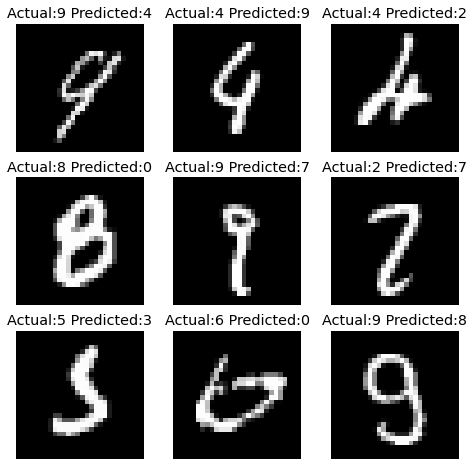

In [49]:
plt.figure(figsize=(8,8))
for k in range(0,9): # choose 10 examples
    plt.subplot(3,3,k+1) # select the current subplot
    plt.imshow(np.squeeze(X_test[incorrect_labels[k],:,:]),cmap='gray') # plot the image
    plt.title('Actual:'+str(y_test[incorrect_labels[k]])+' Predicted:'+str(y_predict[incorrect_labels[k]]))
    plt.axis('off')

In many of these cases, the digits do not appear "typical" in form and it is thus not surprising that the network may have had difficulty correctly classifying them.  In most cases, it is also easy to postulate what structures in the image may have resulted in the incorrect classification that did result.

## <span style='color:Green'> Your turn: </span>
Explore the performance of `model3` in which we used a `'relu'` activation on the output layer and `model4` in which we used a `'binary_crossentropy'` loss.

In [50]:
score = model3.evaluate(X_test, Y_test, verbose=1)
print(score)

Y_predict = model3.predict(X_test,verbose=1)
y_predict = Y_predict.argmax(axis=-1)

my_acc = (y_predict==y_test).sum()/len(y_predict)
print('My accuracy computation says:')
print(my_acc)

print(Y_predict)

10000/10000 [==============================] - 3s 277us/step
[nan, 0.09799999743700027]
10000/10000 [==============================] - 3s 280us/step
My accuracy computation says:
0.098
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [51]:
score = model4.evaluate(X_test, Y_test, verbose=1)
print(score)

Y_predict = model4.predict(X_test,verbose=1)
y_predict = Y_predict.argmax(axis=-1)

my_acc = (y_predict==y_test).sum()/len(y_predict)
print('My accuracy computation says:')
print(my_acc)

print(Y_predict)

10000/10000 [==============================] - 3s 284us/step
[0.008329089531244244, 0.9970998167991638]
10000/10000 [==============================] - 3s 261us/step
My accuracy computation says:
0.9853
[[1.1872069e-06 4.1456741e-07 1.1227816e-05 ... 9.9994314e-01
  1.7952790e-06 1.7386234e-05]
 [5.6199810e-06 2.4471501e-05 9.9996150e-01 ... 1.7546233e-10
  7.2138693e-07 1.1294094e-10]
 [2.7960587e-05 9.9733692e-01 9.9517245e-05 ... 4.8216814e-04
  1.3828307e-04 1.0198528e-05]
 ...
 [2.7971680e-08 5.0118074e-06 1.3510286e-08 ... 2.4011679e-05
  1.6997645e-05 8.9253699e-05]
 [1.3148812e-06 1.0482261e-07 1.7198752e-09 ... 1.5985391e-08
  2.2888272e-03 1.7434435e-06]
 [1.0015426e-04 4.2752347e-08 8.1198792e-05 ... 3.0079732e-09
  6.3109624e-06 7.4545000e-08]]


The issues with `model3` were probably apparent in the training stage, in that the accuracy reported was very low.  You may also have noticed that the predicted one-hot labels `Y_predict` are not consistent with the probabilities that we get for a `softmax` activation.  In some cases, you may get values in `Y_predict` that are not-a-number (`nan`) which is another indication that the training has gone very wrong.

The issues with `model4` are much more subtle.  You should have noticed that the accuracy reported by `keras`' `evaluate` function is not the same as when we compute it by hand.  From the documentation (https://keras.io/api/losses/probabilistic_losses/), we note that `'binary_crossentropy'` should be used "when there are only two label classes" whereas `'categorical_crossentropy'` should be used "when there are two or more label classes." 

# Section 5: Transfer Learning
## 5.1 Applying the MNIST Network Directly to Fashion-MNIST
Here we look at what happens when we input data to a network that is completely different than what it has seen before.  To make our lives easier, we will use the Fashion-MNIST dataset which is designed as a dropin for the MNIST dataset.  This way, we don't need to worry about as many details in the data preprocessing and can focus on the behavior of the network to completely different data.

We import and preprocess the Fashion-MNIST dataset in exactly the same way we did the MNIST data.

In [52]:
(X_train_f, y_train_f), (X_test_f, y_test_f) = fashion_mnist.load_data()
X_train_f = X_train_f.reshape(X_train_f.shape[0], 28, 28, 1)
X_train_f = X_train_f.astype('float32')
X_train_f /= 255
Y_train_f = np_utils.to_categorical(y_train_f, 10)
X_test_f = X_test_f.reshape(X_test_f.shape[0], 28, 28, 1)
X_test_f = X_test_f.astype('float32')
X_test_f /= 255
Y_test_f = np_utils.to_categorical(y_test_f, 10)

4423680/4422102 [==============================] - 4s 1us/step


Let's check the performance of the MNIST network on this new dataset.

In [53]:
score = model1.evaluate(X_test_f, Y_test_f, verbose=1)
print(score)

10000/10000 [==============================] - 2s 217us/step
[3.990008299255371, 0.1581999957561493]


As a point of reference, since there are 10 classes in the Fashion-MNIST dataset, you would expect a random guess to yield approximately 10% accuracy.  We find about 8% accuracy (this may differ depending on exactly where your model converged to in training and may differ from run to run given the random initialization and randomization in assigning data to batches).  Why is the performance so bad?  

Let's look at one of the images from the Fashion-MNIST dataset.

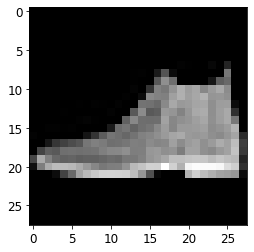

This image is class 7 in the Fashion-MNIST dataset


In [54]:
plt.figure()
plt.imshow(np.squeeze(X_test_f[0]),cmap='gray')
plt.show()
print('This image is class '+str(y_test[0])+' in the Fashion-MNIST dataset')

We see that this is an image of a "sneaker," which also corresponds to class 7 in the Fashion-MNIST dataset (see https://keras.io/datasets/ for the full list of class labels and descriptions).

Let's see what class our digit MNIST network classifies this image as.

In [55]:
Y_example = model1.predict(X_test_f[0].reshape(1,28,28,1),verbose=1)
y_example = np.argmax(Y_example)
print(y_example)

1/1 [==============================] - 0s 9ms/step
2


In [56]:
np.round(Y_example,2)

array([[0.  , 0.1 , 0.8 , 0.  , 0.01, 0.01, 0.07, 0.  , 0.  , 0.  ]],
      dtype=float32)

This network has decided that this image of a "sneaker" is the digit "2" (the network usually converges to "2", but may have converged to a different value depending on differences in training).  It has never seen a sneaker.  But it will still do its level best to match that sneaker to the closest thing it knows.  In this case, that is apparently a "2".

## 5.2 Adapting the MNIST Model for Fashion-MNIST (Transfer Learning)

In transfer learning, we can "transfer" knowledge learned in one domain (e.g., MNIST) to another domain (e.g., Fashion-MNIST).  The idea of transfer learning is predicated on the assumption that all images share the same basic primitives (edges, corners, etc.) which are essentially the features of images that we hand-designed in the second tutorial.  In transfer learning, we re-use those image primitives and only have to relearn how to combine those primitives together in order to correctly classify a new domain of images.  To do this, we will copy our MNIST `model1` architecture and "freeze" all layers except the last layer by setting the `trainable` attribute of layers to `False`.  All the parameters from the two convolutional layers and the first fully connected layer will remain in the state that we converged to when training the network on MNIST.  It is only that final fully connected layer that will change in order to (hopefully) learn to correctly classify the Fashion-MNIST data. 

In [57]:
model1_f = keras.models.clone_model(model1)
model1_f.set_weights(model1.get_weights())

for layer in model1_f.layers[:-1]:
    layer.trainable=False
    
model1_f.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

model1_f.fit(X_train_f, Y_train_f, batch_size=64, epochs=1, verbose=1)

Epoch 1/1
60000/60000 [==============================] - 12s 208us/step - loss: 1.1537 - accuracy: 0.6090


The main advantages of transfer learning are related to computational efficiency and small datasets:
 - **Computational Efficiency**: By freezing most of the layers in the network, we have fewer trainable parameters.  This allows us to adapt a network to a new problem with much less computation than it would take to train the entire network from scratch.  This computational advantage may not be apparent here since we are dealing with a relatively small network and small dataset, but can become significant with larger networks and datasets.
 - **Small Datasets**: Training a very large network on a small dataset runs the risk of significant overfitting (learning the data).  Transfer learning allows us to "borrow" knowledge from much larger datasets and focusing the learning on the classification task.

## <span style='color:Green'> Your turn: </span>
How well does our new transfer learning model `model1_f` perform on the Fashion-MNIST data?

In [58]:
score = model1_f.evaluate(X_test_f, Y_test_f, verbose=1)
print(score)

10000/10000 [==============================] - 3s 269us/step
[0.7958072299957275, 0.72079998254776]


You have probably found that the network does not perform as well on the Fashion-MNIST dataset as it did on MNIST.  If you trained the full 2-layer network from scratch (as we did for MNIST), you would achieve approximately 89% test accuracy.  

## <span style='color:Green'> Your turn: </span>
How well does our new transfer learning model `model1_f` perform on the original MNIST data?

In [59]:
score = model1_f.evaluate(X_test, Y_test, verbose=1)
print(score)

10000/10000 [==============================] - 2s 210us/step
[4.287293505096436, 0.3043000102043152]


## <span style='color:Green'> Your turn: </span>
How does the transfer learning work if you freeze fewer layers?

In [60]:
model1_f = keras.models.clone_model(model1)
model1_f.set_weights(model1.get_weights())

for layer in model1_f.layers[:-2]:
    layer.trainable=False
    
model1_f.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

model1_f.fit(X_train_f, Y_train_f, batch_size=64, epochs=1, verbose=1)

score = model1_f.evaluate(X_test_f, Y_test_f, verbose=1)
print(score)

Epoch 1/1
10000/10000 [==============================] - 2s 221us/step
[0.35221141958236696, 0.8718000054359436]


# Section 6: Saving Trained Models
We can save a trained model so that we don't have to go through the bother of training it again later.  The following instructions save the model in a binary file in HDF5 (Hierarchical Data Format).  The use of these commands assume that you have `h5py` (the python interface to HDF5 format) installed.  For at least the Linux version of Anaconda 3.7, it appears that `h5py` was included.  If it does not appear that you have `h5py` installed, you can run the following command from your computer's terminal
```
conda install h5py
```
The successful installation of `h5py`, however, requires that the HDF5 libraries to be installed on your computer.  

In [61]:
model1.save('model1.h5')
model1_f.save('model1_f.h5')

This will save a binary file named `model1.h5` to the same directory as this notebook.  You can load this file and pick up right where we left off.

In [62]:
model1 = load_model('model1.h5')
model1_f = load_model('model1_f.h5')

AttributeError: 'str' object has no attribute 'decode'